In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('german_credit_data.csv')
# Data preparation
df['Sex'] = df['Sex'].replace(['male'],0)
df['Sex'] = df['Sex'].replace(['female'],1)
df['Housing'] = df['Housing'].replace(['own'],0)
df['Housing'] = df['Housing'].replace(['free'],1)
df['Housing'] = df['Housing'].replace(['rent'],2)
df['Saving accounts'] = df['Saving accounts'].fillna(0)
df['Saving accounts'] = df['Saving accounts'].replace(['little'],1)
df['Saving accounts'] = df['Saving accounts'].replace(['moderate'],2)
df['Saving accounts'] = df['Saving accounts'].replace(['quite rich'],3)
df['Saving accounts'] = df['Saving accounts'].replace(['rich'],4)
df['Checking account'] = df['Checking account'].fillna(0)
df['Checking account'] = df['Checking account'].replace(['little'],1)
df['Checking account'] = df['Checking account'].replace(['moderate'],2)
df['Checking account'] = df['Checking account'].replace(['quite rich'],3)
df['Checking account'] = df['Checking account'].replace(['rich'],4)
df['Purpose'] = df['Purpose'].replace(['radio/TV'],0)
df['Purpose'] = df['Purpose'].replace(['domestic appliances'],1)
df['Purpose'] = df['Purpose'].replace(['furniture/equipment'],2)
df['Purpose'] = df['Purpose'].replace(['repairs'],3)
df['Purpose'] = df['Purpose'].replace(['vacation/others'],4)
df['Purpose'] = df['Purpose'].replace(['car'],5)
df['Purpose'] = df['Purpose'].replace(['education'],6)
df['Purpose'] = df['Purpose'].replace(['business'],7)
df['Risk'] = df['Risk'].replace(['good'],1)
df['Risk'] = df['Risk'].replace(['bad'],0)

dataset = df.values
X = dataset[:,1:10]
Y = dataset[:,10]

X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# fit final model
model = LogisticRegression()
Y_train = Y_train.astype('int')
model.fit(X_train, Y_train)
y_sum = 0
for ind in range(len(Y_test)):
    y_sum += Y_test[ind]
y_mean = y_sum / len(Y_test)
ssr = 0
sst = 0
ynew = model.predict(X_test)

for i in range(len(X_test)):
    print("X= {}, True_Y= {} ,Predicted= {}".format(X_test[i], Y_test[i] ,ynew[i]))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 4)
print("Accuracy:",accuracies.mean())
print("Std",accuracies.std())

print("Score:", model.score(X_test,Y_test))

X= [0.41071433 0.         0.6666667  0.5        0.5        0.
 0.06030593 0.02941177 0.        ], True_Y= 1.0 ,Predicted= 1
X= [0.69642866 0.         0.6666667  1.         0.25       0.5
 0.8635964  0.7352941  1.        ], True_Y= 0.0 ,Predicted= 0
X= [0.23214287 1.         0.33333334 0.         0.5        0.5
 0.03747112 0.02941177 0.71428573], True_Y= 0.0 ,Predicted= 1
X= [0.8571429  1.         0.6666667  0.         0.25       0.5
 0.1992957  0.20588237 0.42857146], True_Y= 1.0 ,Predicted= 1
X= [0.28571427 0.         0.6666667  0.5        0.25       0.25
 0.1725542  0.11764707 0.71428573], True_Y= 0.0 ,Predicted= 1
X= [0.46428573 0.         0.33333334 0.         0.75       0.
 0.08253549 0.02941177 0.        ], True_Y= 1.0 ,Predicted= 1
X= [0.08928573 0.         0.6666667  0.         0.         0.5
 0.09794211 0.07352942 0.2857143 ], True_Y= 1.0 ,Predicted= 1
X= [0.28571427 0.         0.6666667  0.         0.         0.5
 0.13634863 0.16176471 0.        ], True_Y= 1.0 ,Predicted= 1
X

In [21]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,0,2,0,0,1,1169,6,0,1
1,1,22,1,2,0,1,2,5951,48,0,0
2,2,49,0,1,0,1,0,2096,12,6,1
3,3,45,0,2,1,1,1,7882,42,2,1
4,4,53,0,2,1,1,1,4870,24,5,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1,0,1,0,1736,12,2,1
996,996,40,0,3,0,1,1,3857,30,5,1
997,997,38,0,2,0,1,0,804,12,0,1
998,998,23,0,2,1,1,1,1845,45,0,0


Age: 0.6376357354845418
Sex: -0.4658826882798547
Job: -0.06335723439124782
Housing: -0.6359589525176921
Saving accounts: 0.24161658197048952
Checking account: -1.24308573996885
Credit amount: -0.1446775432161796
Duration: -1.9019674865761418
Purpose: -0.3175235489543509


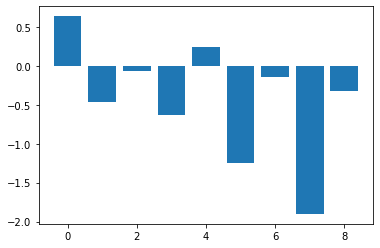

In [23]:
importance = model.coef_
importance = pd.Series(importance[0])
column = pd.DataFrame(df.iloc[:,1:-1]).columns
importance
# summarize feature importance
for i,v in enumerate(importance):
    print(f'{column[i]}: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()